In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()

import warnings
warnings.filterwarnings('ignore')


In [3]:
rand_state=1000

In [4]:
read_file = pd.read_csv(r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli1Polygon2.txt') 

In [5]:
read_file.to_csv (r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli1Polygon2.csv', index=None)

In [6]:
df = pd.read_table('AOI_hitStimuli1Polygon2.csv')

In [7]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli1_Polygon2
0,Skilled,612,325,699,615,329,0
1,Skilled,609,325,699,615,329,0
2,Skilled,611,321,699,615,329,0
3,Skilled,611,324,699,615,329,0
4,Skilled,610,327,699,615,329,0


In [8]:
df.nunique()

Skill_level                    2
Gaze_point_X                 836
Gaze_point_Y                 850
Gaze_event_duration          131
Fixation_point_X             491
Fixation_point_Y             466
AOI_hit_Stimuli1_Polygon2      2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28064 entries, 0 to 28063
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Skill_level                28064 non-null  object
 1   Gaze_point_X               28064 non-null  int64 
 2   Gaze_point_Y               28064 non-null  int64 
 3   Gaze_event_duration        28064 non-null  int64 
 4   Fixation_point_X           28064 non-null  int64 
 5   Fixation_point_Y           28064 non-null  int64 
 6   AOI_hit_Stimuli1_Polygon2  28064 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ MB


In [10]:
df.isna().sum()

Skill_level                  0
Gaze_point_X                 0
Gaze_point_Y                 0
Gaze_event_duration          0
Fixation_point_X             0
Fixation_point_Y             0
AOI_hit_Stimuli1_Polygon2    0
dtype: int64

In [11]:
df.describe()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli1_Polygon2
count,28064.000000,28064.000000,28064.000000,28064.000000,28064.000000,28064.000000
mean,641.027259,301.309008,814.581564,641.770560,301.058331,0.367375
std,180.952162,158.314351,838.125717,180.162423,157.974624,0.482098
min,217.000000,-145.000000,66.000000,246.000000,-140.000000,0.000000
25%,500.000000,195.000000,266.000000,498.000000,193.000000,0.000000
50%,598.000000,263.000000,482.000000,599.000000,263.000000,0.000000
75%,775.000000,386.000000,1015.000000,777.000000,387.000000,1.000000
max,1242.000000,1628.000000,3861.000000,1238.000000,1584.000000,1.000000


<Figure size 600x400 with 0 Axes>

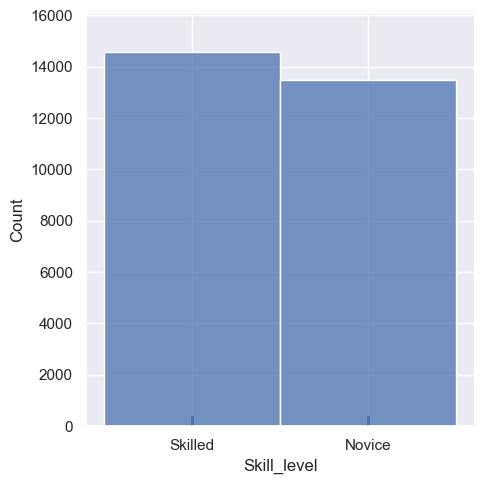

In [12]:
plt.figure(figsize=(6,4))
sns.displot(df['Skill_level'], rug=True)
plt.show()

In [13]:
ordinal_categoricals = ['Skill_level']

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
enc = OrdinalEncoder()

In [16]:
df[ordinal_categoricals] = enc.fit_transform(df[ordinal_categoricals])

In [17]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli1_Polygon2
0,1.0,612,325,699,615,329,0
1,1.0,609,325,699,615,329,0
2,1.0,611,321,699,615,329,0
3,1.0,611,324,699,615,329,0
4,1.0,610,327,699,615,329,0


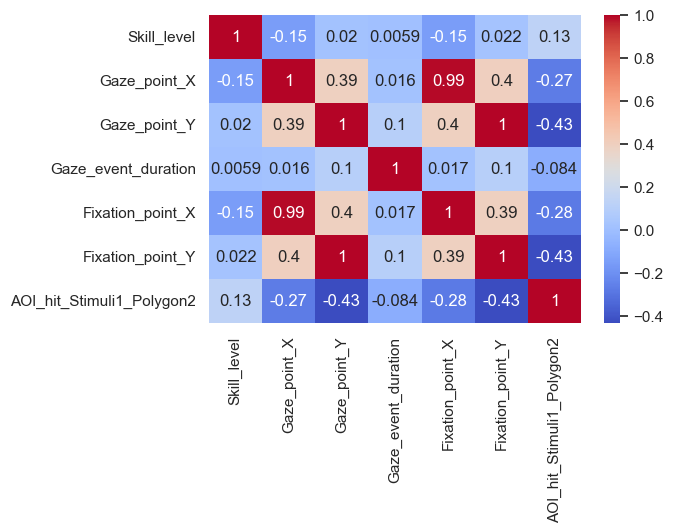

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

CPU times: total: 13.9 s
Wall time: 14.7 s


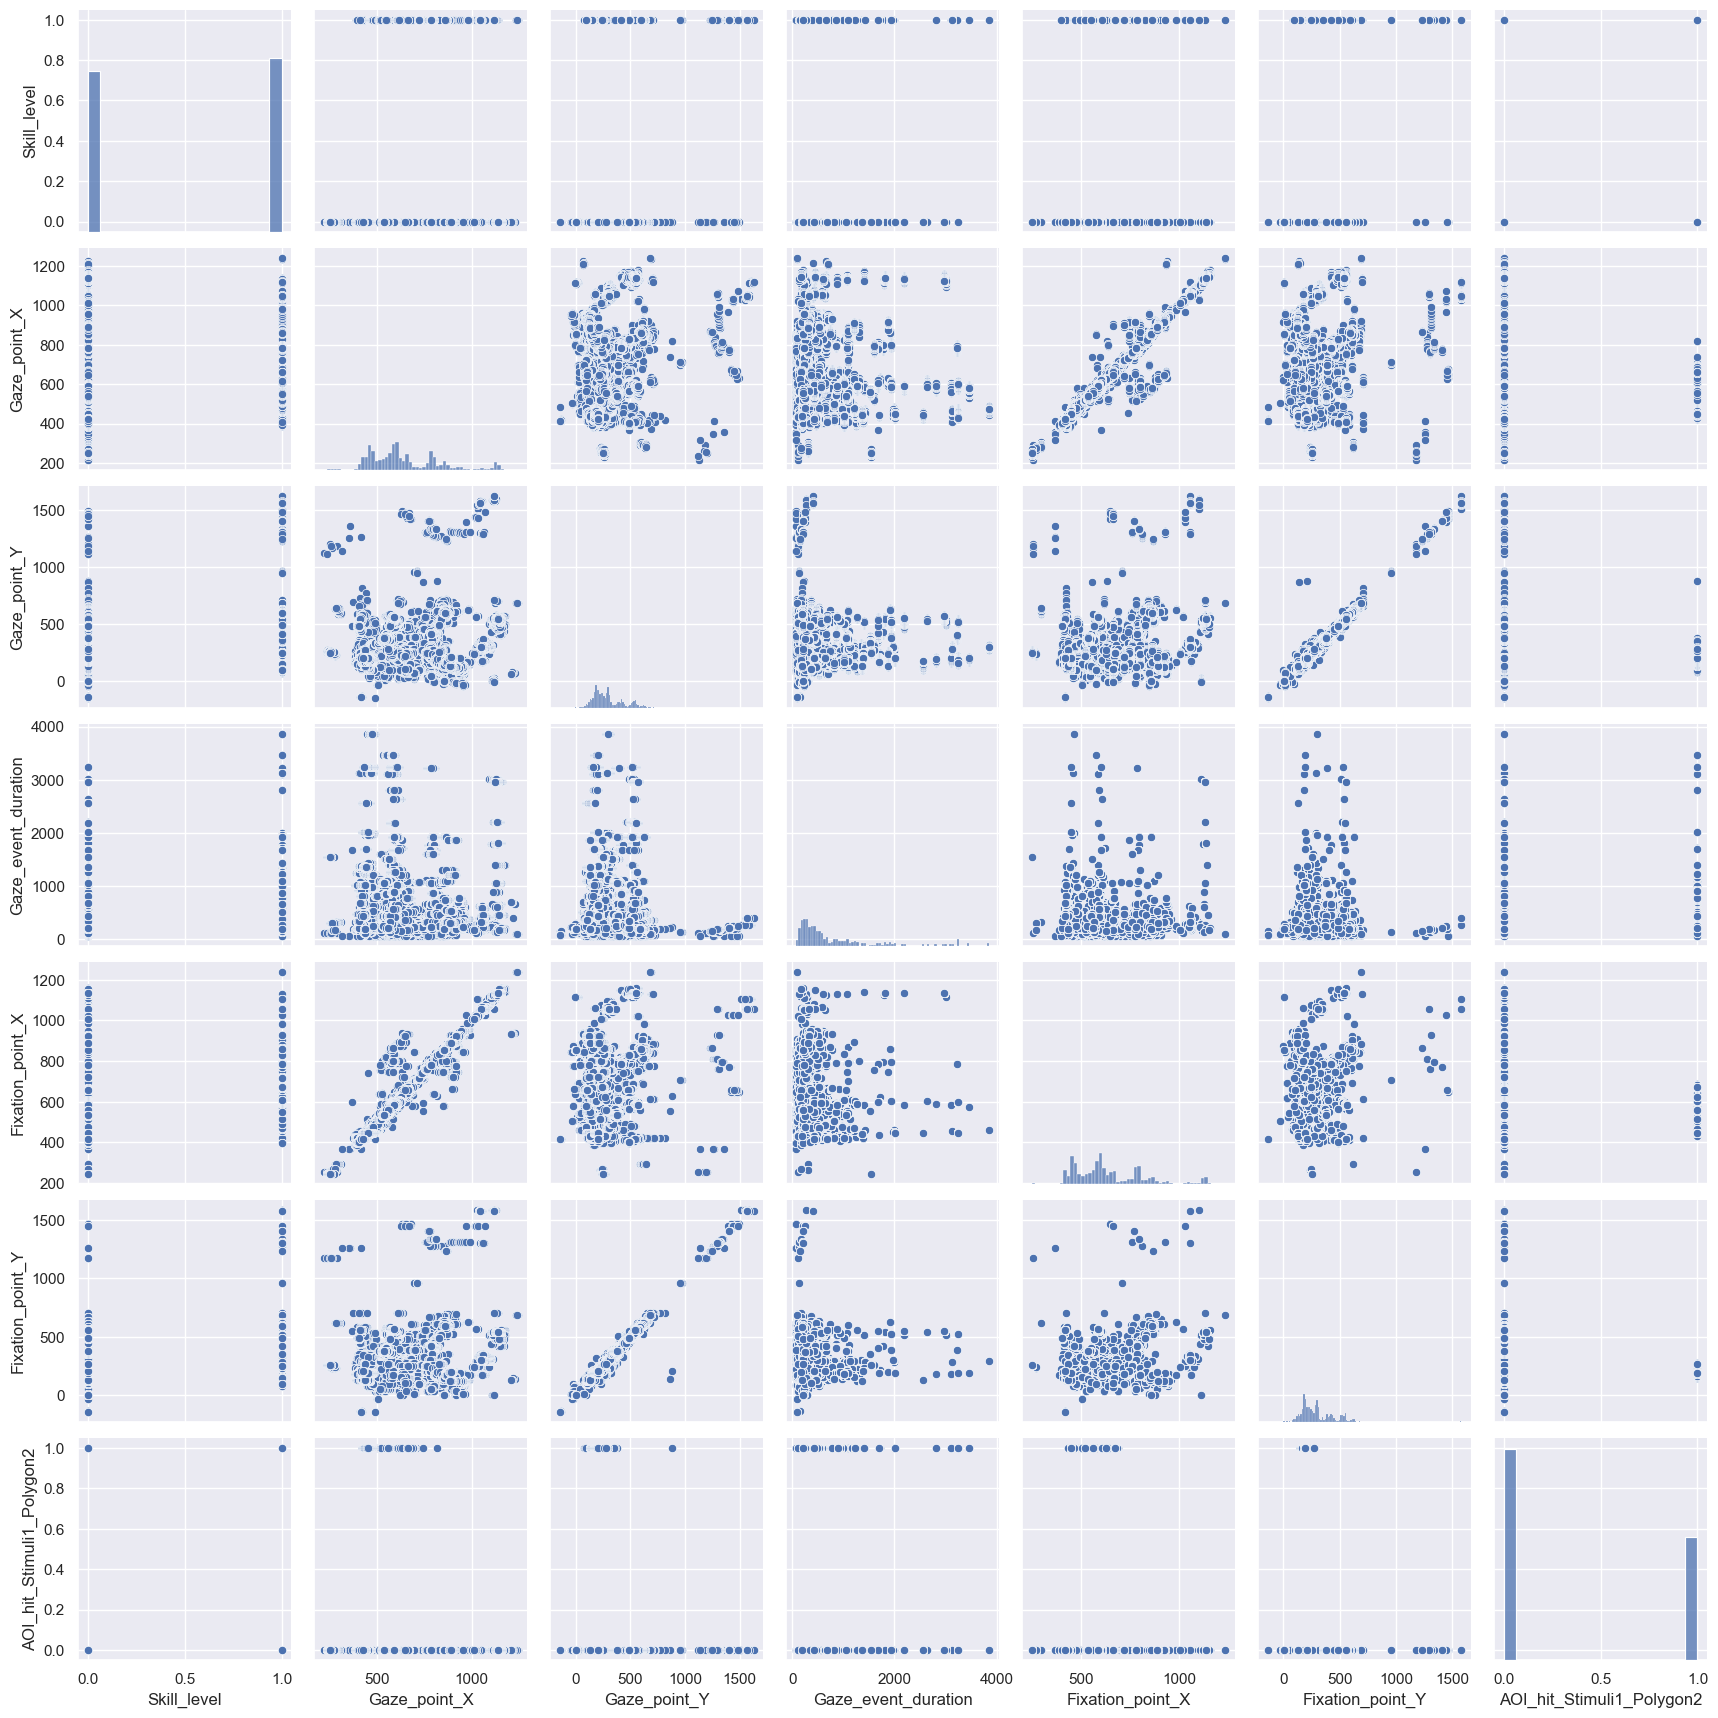

In [20]:
%%time

sns.pairplot(df[['Skill_level', 'Gaze_point_X', 'Gaze_point_Y', 'Gaze_event_duration', 'Fixation_point_X', 'Fixation_point_Y', 'AOI_hit_Stimuli1_Polygon2' ]])

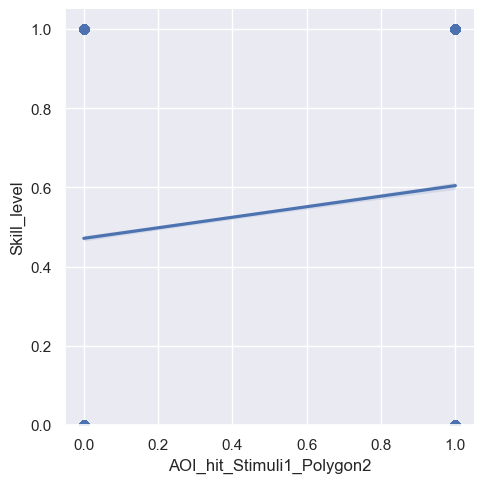

In [22]:
g= sns.lmplot(x='AOI_hit_Stimuli1_Polygon2', y='Skill_level', data=df)
g.set(ylim=(0, None))
plt.show()

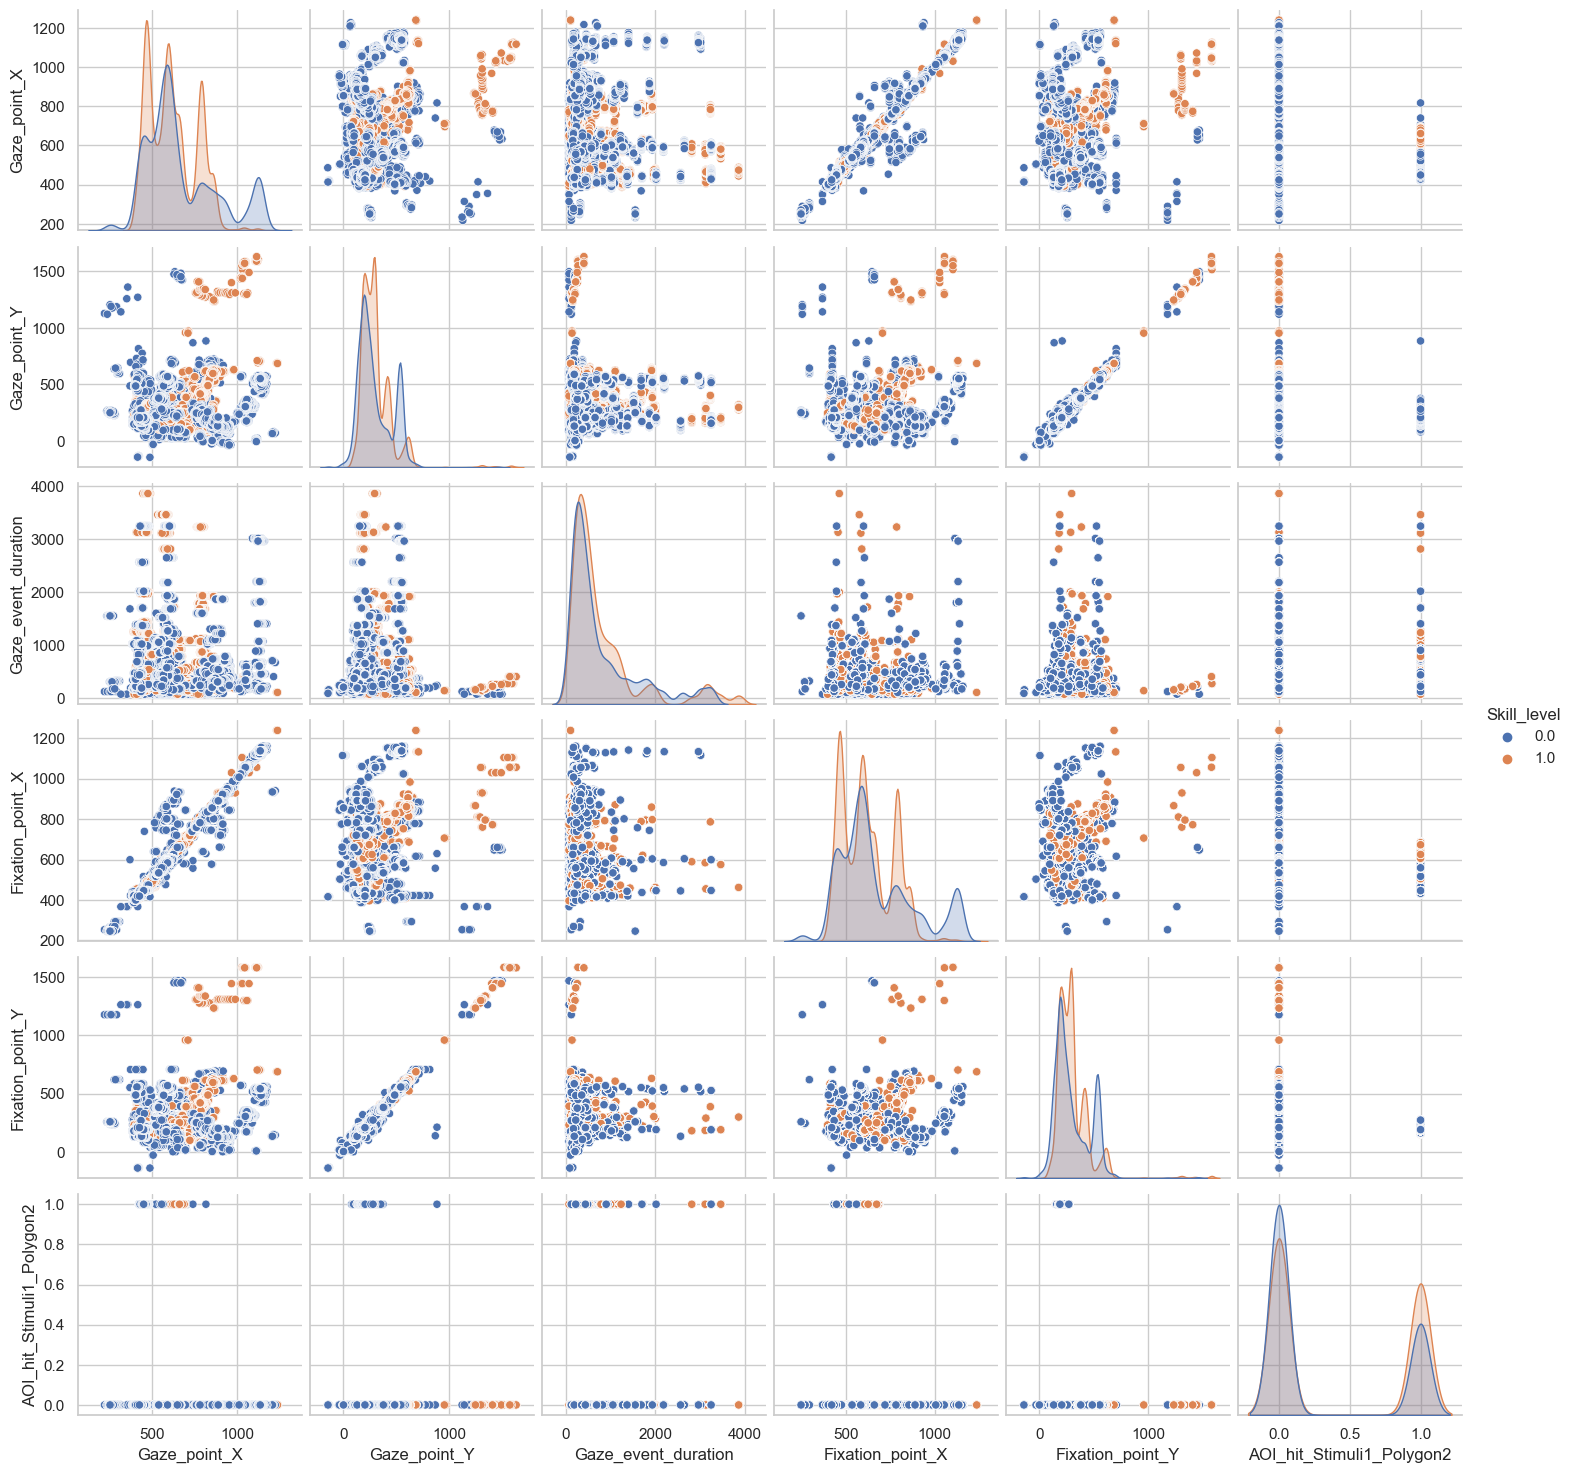

In [26]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Skill_level')

In [27]:
y = df['Skill_level']
X = df.drop('Skill_level', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

np.round(len(X_train)/len(X),3)

0.8

In [28]:
reg_model = LinearRegression()


In [29]:
X_train.head()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli1_Polygon2
9749,715,394,233,718,395,0
23547,1137,529,1065,1132,531,0
14035,488,250,1215,473,290,0
25569,597,539,2646,604,540,0
25923,553,374,1514,555,350,0


In [30]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_hat = reg_model.predict(X_test)

In [32]:
df_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})
df_predictions.head()

,actuals,predictions,resid
11556,1.0,0.445601,0.554399
13654,1.0,0.476247,0.523753
8950,0.0,0.521819,-0.521819
22803,0.0,0.404104,-0.404104
24894,0.0,0.603434,-0.603434


In [33]:
reg_model.coef_

array([ 2.76639326e-04, -1.23574910e-04,  4.00751954e-06, -7.60429208e-04,
        5.99801869e-04,  1.48267595e-01])

In [34]:
reg_model.intercept_

0.6286181838271062

In [35]:
reg_summary = pd.DataFrame(data= X_train.columns, columns=['Features'])
reg_summary ['Coefficients'] = np.round(reg_model.coef_,4)
reg_summary

,Features,Coefficients
0,Gaze_point_X,0.0003
1,Gaze_point_Y,-0.0001
2,Gaze_event_duration,0.0000
3,Fixation_point_X,-0.0008
4,Fixation_point_Y,0.0006
5,AOI_hit_Stimuli1_Polygon2,0.1483


In [36]:
reg_model.score(X_train, y_train)

0.04881165569838464

In [37]:
print('Training data R-squared:', np.round(reg_model.score(X_train, y_train),3))
print('Test data R-squared:', np.round(reg_model.score(X_train, y_train),3))

Training data R-squared: 0.049
Test data R-squared: 0.049


In [38]:
X_train.shape

(22451, 6)

In [39]:
def adj_R2(X,y):
    R2 = reg_model.score(X,y)
    n = X.shape[0]
    k = X.shape[1]
    return np.round(1-(1-R2)*(n-1)/(n-k-1),3)

In [40]:
adj_R2(X_train, y_train)

0.049

In [41]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

0.237

In [42]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [43]:
my_estimator = LinearRegression()

In [44]:
R2 = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="r2")

In [45]:
R2

array([0.0495434 , 0.04412954, 0.05824039, 0.04694627, 0.04282624])

In [46]:
R2_CV = np.mean(R2)
np.round(R2_CV,3)

0.048

In [47]:
NMSE = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")

In [48]:
MSE = -NMSE
MSE

array([0.2375033 , 0.23863306, 0.23507815, 0.2377619 , 0.23872935])

In [49]:
MSE_CV = np.mean(MSE)
np.round(MSE_CV,3)

0.238